In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import pandas as pd 
import numpy as np

## Задание 1

#### Часть 1

Указать описательные статистики, графики плотности и гистограммы для каждого района

In [3]:
df = pd.read_csv('СИА Модуль _Разведочный анализ_ данные - Стоимость аренды квартир.csv')
df = df.drop('номер', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Стоимость квартиры         226 non-null    int64 
 1   Площадь квартиры           226 non-null    object
 2   Петроградская-1, Парнас-0  226 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.4+ KB


In [4]:
df['Площадь квартиры'] = df['Площадь квартиры'].copy().apply(lambda x: float(x.replace(',', '.')))

In [5]:
# район Парнас
district_1 = df[df['Петроградская-1, Парнас-0'] == 1]

# район Петроградская
district_2 = df[df['Петроградская-1, Парнас-0'] == 0]

In [6]:
# статистика по районам
describe_stats = pd.concat([district_1[['Стоимость квартиры', 'Площадь квартиры']].describe(), 
                            district_2[['Стоимость квартиры', 'Площадь квартиры']].describe()], axis=1)
describe_stats.columns = ['Парнас - cтоимость кв', 'Парнас - площадь кв', 
                          'Петроградская - стоимость кв', 'Петроградская - площадь кв']
describe_stats

,Парнас - cтоимость кв,Парнас - площадь кв,Петроградская - стоимость кв,Петроградская - площадь кв
count,126.000000,126.000000,100.000000,100.0000
mean,83115.079365,84.742063,29880.000000,52.3300
std,68314.044316,62.512390,14634.282429,25.6598
min,18000.000000,10.000000,17000.000000,23.0000
25%,45000.000000,43.000000,22000.000000,36.0000
50%,70000.000000,70.000000,25000.000000,42.0000
75%,100000.000000,104.500000,32000.000000,60.0000
max,450000.000000,380.000000,100000.000000,140.0000


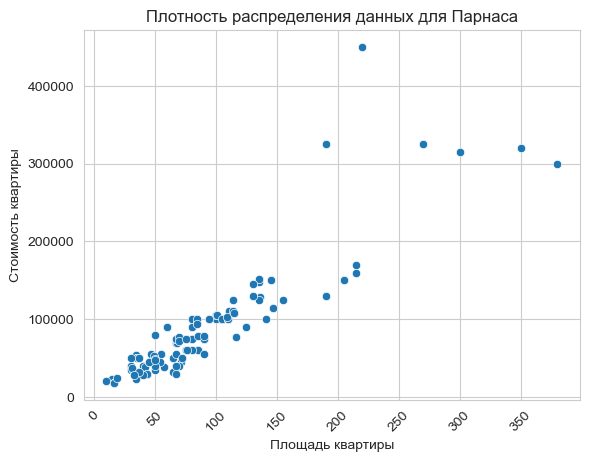

In [7]:
sns.scatterplot(data=district_1, x='Площадь квартиры', y='Стоимость квартиры')
plt.title('Плотность распределения данных для Парнаса')
plt.xticks(rotation=45)
plt.show()

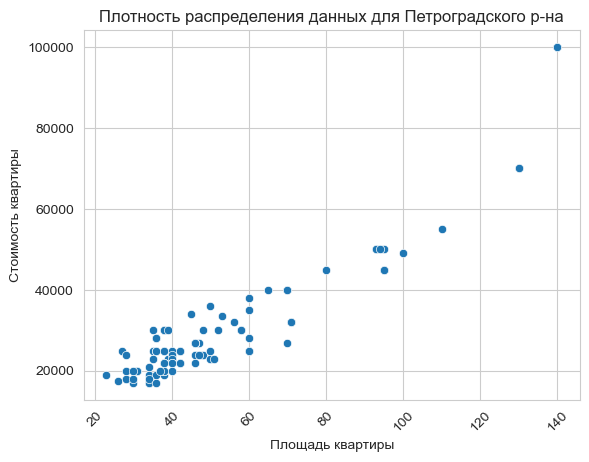

In [8]:
sns.scatterplot(data=district_2, x='Площадь квартиры', y='Стоимость квартиры')
plt.title('Плотность распределения данных для Петроградского р-на')
plt.xticks(rotation=45)
plt.show()

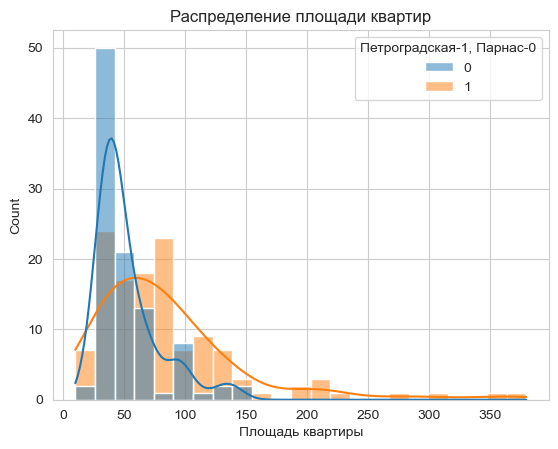

In [9]:
sns.histplot(data=df, x='Площадь квартиры', hue='Петроградская-1, Парнас-0', kde=True)
plt.title('Распределение площади квартир')
plt.show()

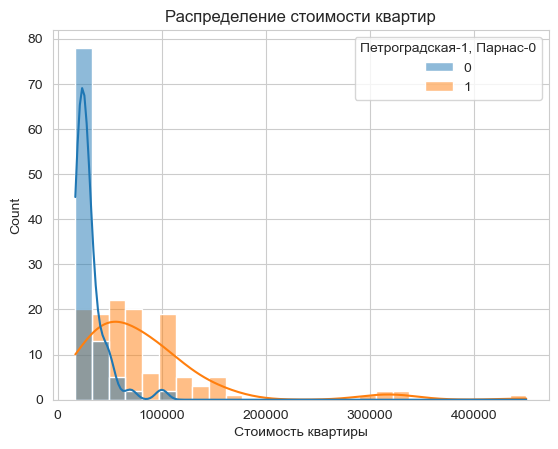

In [10]:
sns.histplot(data=df, x='Стоимость квартиры', hue='Петроградская-1, Парнас-0', kde=True)
plt.title('Распределение стоимости квартир')
plt.show()

#### Часть 2
Построить модель **парной регрессии** для квартир площадью от 20 до 110 кв.м включительно стоимости от площади. Оценить характеристики построенной модели.


In [11]:
# корреляция признаков
df.corr()

,Стоимость квартиры,Площадь квартиры,"Петроградская-1, Парнас-0"
Стоимость квартиры,1.000000,0.887266,0.455191
Площадь квартиры,0.887266,1.000000,0.309301
"Петроградская-1, Парнас-0",0.455191,0.309301,1.000000


In [12]:
import statsmodels.api as sm

In [13]:
# фильтрация данных по условию
filtered = df[(df['Площадь квартиры'] >= 20) & (df['Площадь квартиры'] <= 110)]

In [14]:
X = filtered['Площадь квартиры']
X = sm.add_constant(X)
y = filtered['Стоимость квартиры']

In [15]:
# обучение модели
model_1 = sm.OLS(y, X).fit()

In [16]:
summary = model_1.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     Стоимость квартиры   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           4.01e-38
Time:                        18:58:08   Log-Likelihood:                -2097.0
No. Observations:                 189   AIC:                             4198.
Df Residuals:                     187   BIC:                             4204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2637.4656   3091.642  

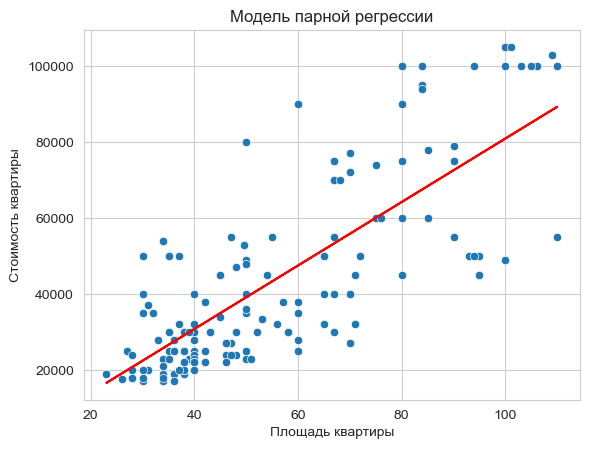

In [17]:
sns.scatterplot(data=filtered, x='Площадь квартиры', y='Стоимость квартиры')
plt.plot(X['Площадь квартиры'], model_1.predict(X), color='red')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость квартиры')
plt.title('Модель парной регрессии')
plt.show()

#### Часть 3
Построить модель **множественной регрессии** для квартир площадью от 20 до 110 кв.м включительно стоимости от площади и района.Оценить характеристики построенной модели.


In [18]:
X = filtered[['Площадь квартиры', 'Петроградская-1, Парнас-0']]
X = sm.add_constant(X)

In [19]:
# обучение модели
model_2 = sm.OLS(y, X).fit()

In [20]:
summary = model_2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     Стоимость квартиры   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     374.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           5.80e-66
Time:                        18:58:12   Log-Likelihood:                -2028.8
No. Observations:                 189   AIC:                             4064.
Df Residuals:                     186   BIC:                             4073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Задание 2

#### Часть 1

Скорректировать выборку случайным образом, чтобы осталось минимум 5000 записей.

In [21]:
df = pd.read_csv('Данные для задания 3 - Лист1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46932 entries, 0 to 46931
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Площадь            46932 non-null  object
 1   Стоимость 1 кв.м.  46932 non-null  object
 2   Стоимость          46932 non-null  object
 3   Этаж               46932 non-null  int64 
 4   Тип дома           46932 non-null  object
 5   Зона               46932 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [22]:
df

,Площадь,Стоимость 1 кв.м.,Стоимость,Этаж,Тип дома,Зона
0,"410,2","263 468,61","108 074 825,42",2,ЭЛИТА,1
1,"409,8","263 812,81","108 110 488,31",2,ЭЛИТА,1
2,"410,4","263 139,83","107 992 585,94",2,ЭЛИТА,1
3,"410,3","263 063,38","107 934 903,83",2,ЭЛИТА,1
4,"410,3","263 267,21","108 018 537,78",2,ЭЛИТА,1
...,...,...,...,...,...,...
46927,"105,1","195 055,06","20 500 287,18",2,БИЗНЕС,4
46928,"103,2","147 023,14","15 172 788,01",2,КИРП_совр,3
46929,"97,6","97 672,31","9 532 817,70",2,СФ,4
46930,"230,7","126 461,09","29 174 574,22",2,КИРП_совр,4


In [23]:
# перевод чисел к float
df['Площадь'] = df['Площадь'].copy().apply(lambda x: float(x.replace(',', '.')))
df['Стоимость 1 кв.м.'] = df['Стоимость 1 кв.м.'].copy().apply(lambda x: float(x.replace(',', '.').replace(' ', '')))
df['Стоимость'] = df['Стоимость'].copy().apply(lambda x: float(x.replace(',', '.').replace(' ', '')))

In [24]:
# статистика по непрерывным признакам
df.describe()[['Площадь', 'Стоимость 1 кв.м.', 'Стоимость']]

,Площадь,Стоимость 1 кв.м.,Стоимость
count,46932.000000,46932.000000,4.693200e+04
mean,88.579027,131732.996604,1.214178e+07
std,68.086648,43520.103346,1.178597e+07
min,3.300000,61266.670000,4.095822e+05
25%,56.000000,104107.977500,6.701086e+06
50%,74.100000,114853.525000,8.700359e+06
75%,105.100000,135719.225000,1.283754e+07
max,8520.400000,315188.530000,8.878265e+08


In [25]:
# диапазон выбросов [m-3*s;  m+3*s]
def drop_anomaly(df, col_name):
    m = df[col_name].mean()
    s = a = df[col_name].std()
    return df[(df[col_name] >= m-3*s) & (df[col_name] <= m+3*s)]

In [26]:
# избавление от выбросов
df = drop_anomaly(df.copy(), 'Площадь')
df = drop_anomaly(df.copy(), 'Стоимость 1 кв.м.')
df = drop_anomaly(df.copy(), 'Стоимость')

In [27]:
# статистика непрерывных признаков после выбросов
df.describe()[['Площадь', 'Стоимость 1 кв.м.', 'Стоимость']]

,Площадь,Стоимость 1 кв.м.,Стоимость
count,44035.000000,44035.000000,4.403500e+04
mean,81.370508,124625.932105,1.004983e+07
std,38.888211,32352.222625,5.480365e+06
min,3.300000,61266.670000,4.095822e+05
25%,54.900000,103689.685000,6.588206e+06
50%,71.600000,113406.300000,8.395278e+06
75%,98.400000,130333.160000,1.150167e+07
max,292.700000,260715.100000,3.383975e+07


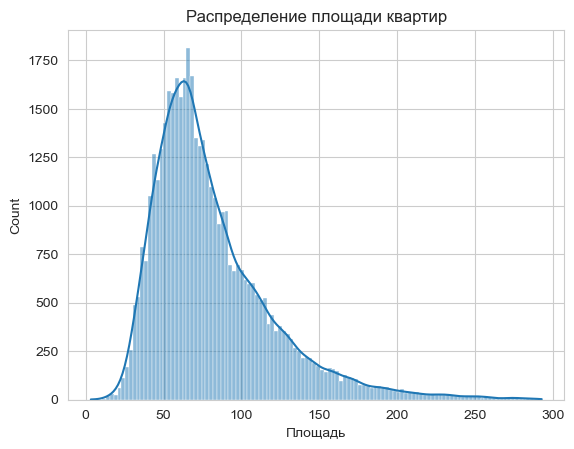

In [28]:
sns.histplot(data=df, x='Площадь', kde=True)
plt.title('Распределение площади квартир')
plt.show()

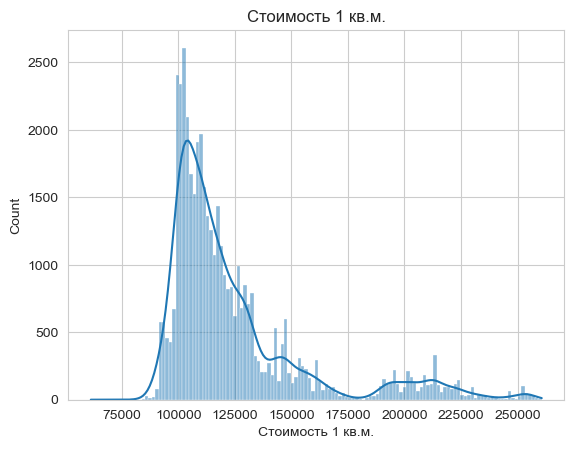

In [29]:
sns.histplot(data=df, x='Стоимость 1 кв.м.', kde=True)
plt.title('Стоимость 1 кв.м.')
plt.show()

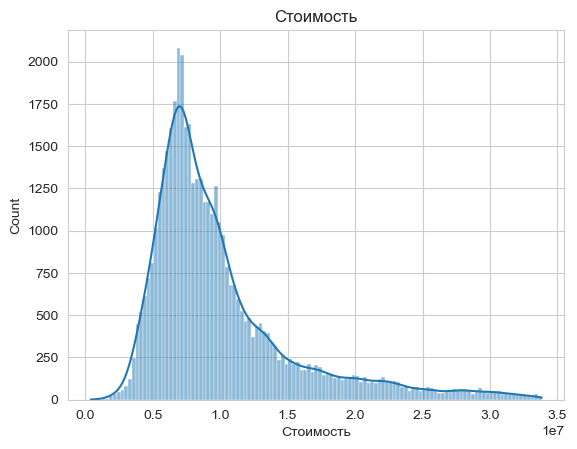

In [30]:
sns.histplot(data=df, x='Стоимость', kde=True)
plt.title('Стоимость')
plt.show()

In [31]:
# выборка случайных данных
data = df.sample(n=5000, random_state=42)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 19840 to 37395
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Площадь            5000 non-null   float64
 1   Стоимость 1 кв.м.  5000 non-null   float64
 2   Стоимость          5000 non-null   float64
 3   Этаж               5000 non-null   int64  
 4   Тип дома           5000 non-null   object 
 5   Зона               5000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 273.4+ KB


#### Часть 2
Построить модель множественной регрессии, где в качестве зависимой переменной выступает стоимость квартиры. Для построения модели преобразовать переменную “Тип дома” в фиктивные переменные. Коэффициенты подобрать самостоятельно. Оценить качество модели. Учесть, что коэффициенты модели должны быть статистически значимы

In [32]:
data['Тип дома'].value_counts()

СФ           2180
СФ_КР         742
КИРП_совр     652
СТАЛ          597
БИЗНЕС        425
КИРП_ТИП      126
КОНСТР         94
КИРП_5эт       70
ИНД            57
ЭЛИТА          36
ПАН_5эт         9
ПАН_совр        7
МАЛЭТ           5
Name: Тип дома, dtype: int64

In [33]:
# one-hot encoding категориальных данных
encoded_data = pd.get_dummies(data, columns=['Тип дома'])
encoded_data

,Площадь,Стоимость 1 кв.м.,Стоимость,Этаж,Зона,Тип дома_БИЗНЕС,Тип дома_ИНД,Тип дома_КИРП_5эт,Тип дома_КИРП_ТИП,Тип дома_КИРП_совр,Тип дома_КОНСТР,Тип дома_МАЛЭТ,Тип дома_ПАН_5эт,Тип дома_ПАН_совр,Тип дома_СТАЛ,Тип дома_СФ,Тип дома_СФ_КР,Тип дома_ЭЛИТА
19840,110.2,126861.24,13980108.41,2,3,0,0,0,0,0,0,0,0,0,0,0,1,0
17080,68.1,108137.07,7364134.15,2,4,0,0,0,0,0,0,0,0,0,0,1,0,0
12297,43.7,123626.80,5402491.19,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0
44228,65.5,115309.84,7552794.37,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0
20117,66.1,115223.39,7616266.17,2,4,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23109,77.3,102616.22,7932233.45,2,4,0,0,0,0,0,0,0,0,0,0,1,0,0
27961,148.7,134383.57,19982837.28,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0
22372,98.5,113853.64,11214583.88,2,4,0,0,0,0,0,0,0,0,0,0,0,1,0
26688,106.1,115828.47,12289401.05,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
encoded_data.columns

Index(['Площадь', 'Стоимость 1 кв.м.', 'Стоимость', 'Этаж', 'Зона',
       'Тип дома_БИЗНЕС', 'Тип дома_ИНД', 'Тип дома_КИРП_5эт',
       'Тип дома_КИРП_ТИП', 'Тип дома_КИРП_совр', 'Тип дома_КОНСТР',
       'Тип дома_МАЛЭТ', 'Тип дома_ПАН_5эт', 'Тип дома_ПАН_совр',
       'Тип дома_СТАЛ', 'Тип дома_СФ', 'Тип дома_СФ_КР', 'Тип дома_ЭЛИТА'],
      dtype='object')

In [35]:
y = encoded_data['Стоимость']
X = encoded_data[['Площадь', 'Стоимость 1 кв.м.', 'Этаж', 'Зона',
       'Тип дома_БИЗНЕС', 'Тип дома_ИНД', 'Тип дома_КИРП_5эт',
       'Тип дома_КИРП_ТИП', 'Тип дома_КИРП_совр', 'Тип дома_КОНСТР',
       'Тип дома_МАЛЭТ', 'Тип дома_ПАН_5эт', 'Тип дома_ПАН_совр',
       'Тип дома_СТАЛ', 'Тип дома_СФ', 'Тип дома_СФ_КР', 'Тип дома_ЭЛИТА']]
X_with_bias = sm.add_constant(X)

In [36]:
# обучение модели
model_3 = sm.OLS(y, X_with_bias).fit()

In [37]:
summary = model_3.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:              Стоимость   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     8415.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:58:27   Log-Likelihood:                -76412.
No. Observations:                5000   AIC:                         1.529e+05
Df Residuals:                    4983   BIC:                         1.530e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.362e+06   4.74

## Задание 3

Для выбранных данных провести кластеризацию каждым из методов. Переменные подобрать самостоятельно из количественных. Оценить характеристики построенной модели и выводы по результатам.
- метод к-средних
- древовидная классификация


In [38]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from tqdm import tqdm

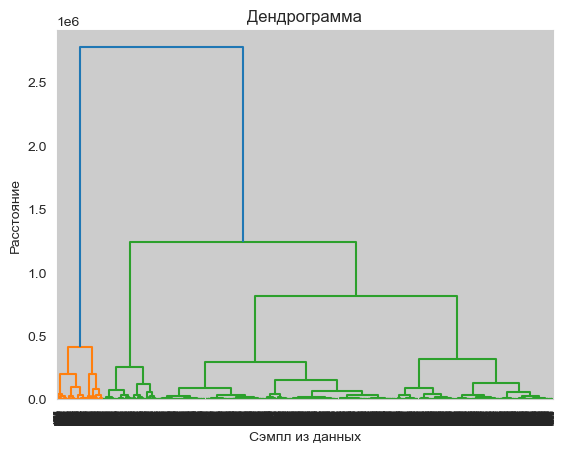

In [97]:
# дендограмма 
linkage_matrix = linkage(X, method='ward')

dendrogram(linkage_matrix)
plt.xlabel('Сэмпл из данных')
plt.ylabel('Расстояние')
plt.title('Дендрограмма')
plt.show()

In [40]:
# поиск оптимального числа кластеров от 0 до 5000 (вся выборка) через silhouette_scores
silhouette_scores = []
stop_value = 100
for i_clusters in tqdm(range(2, stop_value)):
    clustering = AgglomerativeClustering(n_clusters=i_clusters)
    labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [03:34<00:00,  2.19s/it]


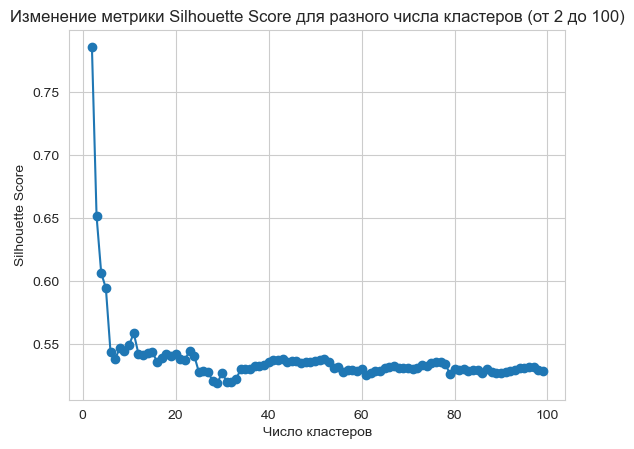

In [41]:
plt.plot(list(range(2, stop_value)), silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.title('Изменение метрики Silhouette Score для разного числа кластеров (от 2 до 100)')
plt.show()

In [42]:
# поиск оптимального числа кластеров
optimal_n_clusters = np.array(silhouette_scores).argmax() + 2
print(f'Оптимальное число кластеров: {optimal_n_clusters}')

Оптимальное число кластеров: 2


In [44]:
# обучение модели K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
predictions = kmeans.fit_predict(X)

C:\Users\justa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
predictions.shape

(5000,)

In [78]:
from sklearn.decomposition import PCA

In [98]:
# снижение размерности признаков до 3 коордтгпь
icpa = IncrementalPCA(n_components=2)
new_X = icpa.fit_transform(X)
x, y = new_X[:, 0], new_X[:, 1]

In [99]:
# df с данными о точках
data_plot = pd.DataFrame({'x': x, 'y': y, 'cluster': predictions})
data_plot

,x,y,cluster
0,2050.432641,28.738542,0
1,-16673.733313,-15.129450,0
2,-1184.001071,-38.068129,0
3,-9500.963092,-17.053598,0
4,-9587.413148,-16.461763,0
...,...,...,...
4995,-22194.584157,-6.450835,0
4996,9572.758974,67.948790,0
4997,-10957.166203,15.809117,0
4998,-8982.336928,23.595041,0


In [100]:
data_plot['cluster'].value_counts()

0    4400
1     600
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Кластеризация K-Means с понижением размерности признаков')

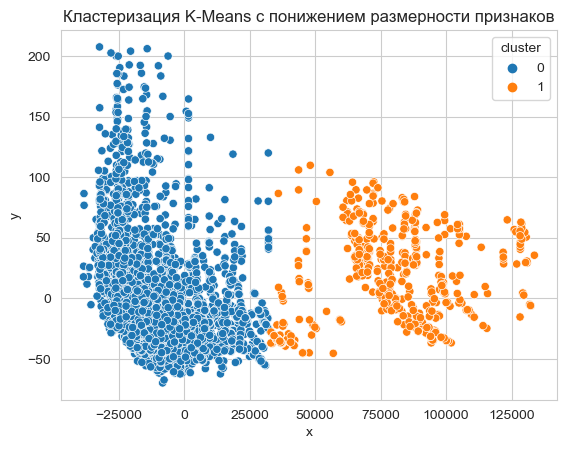

In [96]:
sns.scatterplot(data=data_plot, x='x', y='y', hue='cluster')
plt.title('Кластеризация K-Means с понижением размерности признаков')